In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
df = pd.DataFrame({
    'Máquina': ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10'],
    'Temperatura': [70.2, 65.1, 75.5, 80.3, 68.7, 72.9, 78.6, 66.4, 73.1, 69.5],
    'Vibração': [12.5, 8.2, 15.6, 10.2, 11.8, 14.3, 9.8, 8.9, 13.7, 12.1],
    'Corrente': [4.7, 3.9, 5.1, 4.5, 4.2, 5.3, 4.8, 4.0, 5.0, 4.3]
})

In [20]:
df = pd.get_dummies(df, columns=['Máquina'])
df

,Temperatura,Vibração,Corrente,Máquina_M1,Máquina_M10,Máquina_M2,Máquina_M3,Máquina_M4,Máquina_M5,Máquina_M6,Máquina_M7,Máquina_M8,Máquina_M9
0,70.2,12.5,4.7,True,False,False,False,False,False,False,False,False,False
1,65.1,8.2,3.9,False,False,True,False,False,False,False,False,False,False
2,75.5,15.6,5.1,False,False,False,True,False,False,False,False,False,False
3,80.3,10.2,4.5,False,False,False,False,True,False,False,False,False,False
4,68.7,11.8,4.2,False,False,False,False,False,True,False,False,False,False
5,72.9,14.3,5.3,False,False,False,False,False,False,True,False,False,False
6,78.6,9.8,4.8,False,False,False,False,False,False,False,True,False,False
7,66.4,8.9,4.0,False,False,False,False,False,False,False,False,True,False
8,73.1,13.7,5.0,False,False,False,False,False,False,False,False,False,True
9,69.5,12.1,4.3,False,True,False,False,False,False,False,False,False,False


In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

c:\Users\mta6ca\Documents\BoschFiles\Senai-University-Files\2023.2\Big Data e IA\FormsExercise\forms5\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [22]:
sse = kmeans.inertia_
sse
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Dados de Máquinas')

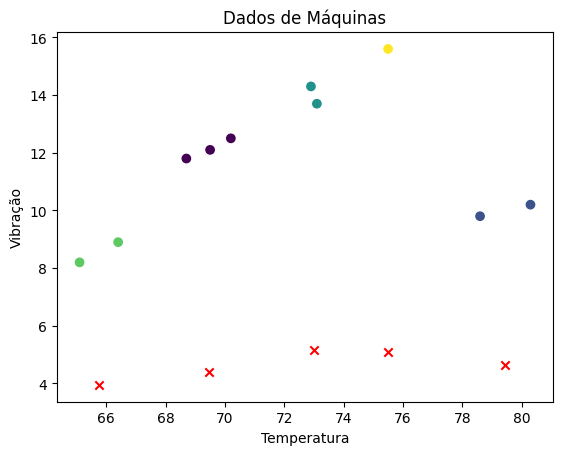

In [23]:
plt.scatter(df['Temperatura'], df['Vibração'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red')
plt.xlabel('Temperatura')
plt.ylabel('Vibração')
plt.title('Dados de Máquinas')

In [24]:
df['Group'] = labels
grouped_data = df.groupby('Group').mean()
grouped_data

,Temperatura,Vibração,Corrente,Máquina_M1,Máquina_M10,Máquina_M2,Máquina_M3,Máquina_M4,Máquina_M5,Máquina_M6,Máquina_M7,Máquina_M8,Máquina_M9
Group,,,,,,,,,,,,,
0,69.466667,12.133333,4.40,0.333333,0.333333,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
1,79.450000,10.000000,4.65,0.000000,0.000000,0.0,0.0,0.5,0.000000,0.0,0.5,0.0,0.0
2,73.000000,14.000000,5.15,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.5
3,65.750000,8.550000,3.95,0.000000,0.000000,0.5,0.0,0.0,0.000000,0.0,0.0,0.5,0.0
4,75.500000,15.600000,5.10,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
